In [1]:
import numpy as np
import plotly
import math
import scipy
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def dx_dt(t, x, y, z, sigma, b, r):
    return sigma * (y - x)

def dy_dt(t, x, y, z, sigma, b, r):
    return x * (r - z) - y

def dz_dt(t, x, y, z, sigma, b, r):
    return x * y - b * z

In [4]:
sigma = 10
b = 8/3
rs = [0.5, 10, 24.06, 30]
dt = 0.001
max_t = 20

In [5]:
def solve_euler(r, t0=0, x0=13.41265629, y0=13.46430003, z0=33.46156416):
    t = t0
    x = x0
    y = y0
    z = z0
    
    ts = [t0]
    xs = [x0]
    ys = [y0]
    zs = [z0]
    
    while t < max_t:
        t += dt
        x += dx_dt(t, x, y, z, sigma, b, r) * dt
        y += dy_dt(t, x, y, z, sigma, b, r) * dt
        z += dz_dt(t, x, y, z, sigma, b, r) * dt
        
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    
    return ts, xs, ys, zs

In [6]:
def draw(solver):
    for r in rs:
        ts, xs, ys, zs = solver(r)

        print('r = {0}'.format(r))
        plt.plot(ts, xs, 'red')
        plt.show()
        plt.plot(ts, ys, 'green')
        plt.show()
        plt.plot(ts, zs, 'blue')
        plt.show()

        fig = go.Figure(
            data=[
                go.Scatter3d(
                    x=xs,
                    y=ys,
                    z=zs,
                    marker=go.Marker(
                        size=1
                    )
                )
            ]
        )
        fig.show()

r = 0.5


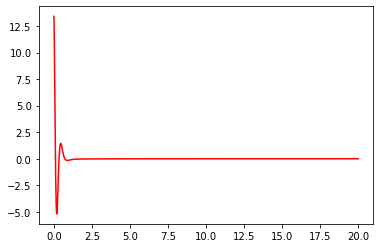

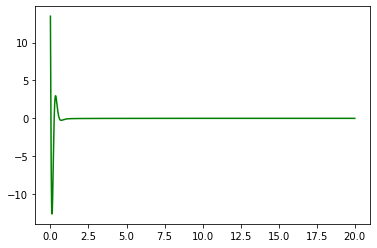

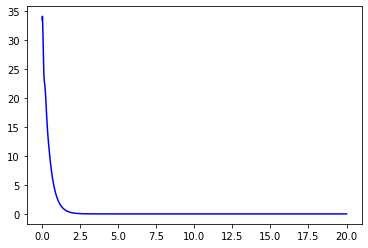

r = 10


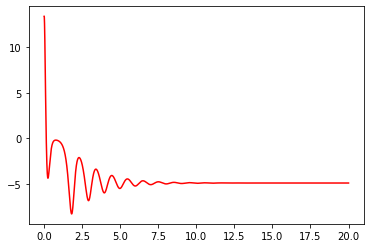

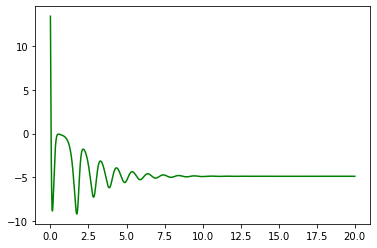

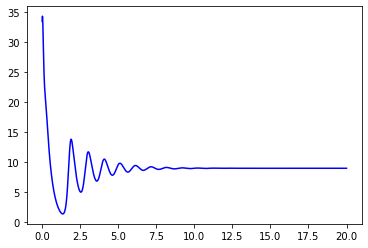

In [ ]:
draw(solve_euler)

In [ ]:
def solve_euler_non_evident(r, t0=0, x0=13.41265629, y0=13.46430003, z0=33.46156416):
    t = t0
    x = x0
    y = y0
    z = z0
    
    ts = [t0]
    xs = [x0]
    ys = [y0]
    zs = [z0]
    
    while t < max_t:
        t += dt
        
        x0 = x + dx_dt(t, x, y, z, sigma, b, r) * dt
        y0 = y + dy_dt(t, x, y, z, sigma, b, r) * dt
        z0 = z + dz_dt(t, x, y, z, sigma, b, r) * dt
        
        x += dx_dt(t, x0, y0, z0, sigma, b, r) * dt
        y += dy_dt(t, x0, y0, z0, sigma, b, r) * dt
        z += dz_dt(t, x0, y0, z0, sigma, b, r) * dt
        
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    
    return ts, xs, ys, zs

In [ ]:
draw(solve_euler_non_evident)